In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df= pd.read_csv("data.csv")

In [12]:
print (df)

      Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0  humidity  windspeed  \
0                0             0           0      79.5       12.2   
1                1             1           1      85.0       11.2   
2                2             2           2      83.2       11.5   
3                3             3           3      82.8       10.1   
4                4             4           4      83.0        9.7   
...            ...           ...         ...       ...        ...   
5054          5054          5054         114      45.8       20.5   
5055          5055          5055         115      49.9       17.6   
5056          5056          5056         116      53.5       32.8   
5057          5057          5057         117      59.1       27.4   
5058          5058          5058         118      55.4       25.2   

      winddirection  tempC  tempminC  tempmaxC  precipitation        date  
0             343.1   18.6      15.2      24.2            0.0  2022-01-01  
1             341.0

In [5]:
print (df.head())

   Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0  humidity  windspeed  winddirection  \
0             0             0           0      79.5       12.2          343.1   
1             1             1           1      85.0       11.2          341.0   
2             2             2           2      83.2       11.5          340.9   
3             3             3           3      82.8       10.1          345.9   
4             4             4           4      83.0        9.7          341.3   

   tempC  tempminC  tempmaxC  precipitation        date  
0   18.6      15.2      24.2            0.0  2022-01-01  
1   17.4      14.8      22.4            0.0  2022-01-02  
2   17.9      14.0      24.2            0.0  2022-01-03  
3   17.2      13.4      23.8            0.0  2022-01-04  
4   17.2      13.6      23.8            0.0  2022-01-05  


In [9]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='tempC', data=df,)
plt.title('daily temperature over time')
plt.xlabel("Date")
plt.ylabel('Temperature(degrees celcius)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
                    

NameError: name 'plt' is not defined

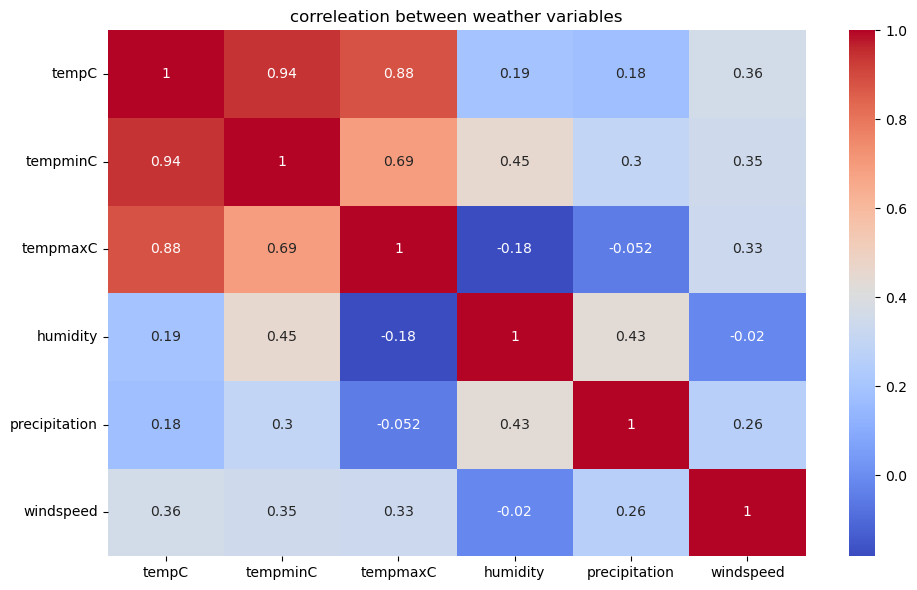

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(df[['tempC', 'tempminC', 'tempmaxC', 'humidity', 'precipitation', 'windspeed']].corr(), annot=True, cmap='coolwarm')
plt.title('correleation between weather variables')
plt.tight_layout()
plt.show()

In [7]:
df['date']= pd.to_datetime(df['date'], errors='coerce')
df['month']=df['date'].dt.month_name()
month_order=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November","December"]
df["month"]=pd.Categorical(df["month"], categories=month_order, ordered=True,)
monthly_avg_ppt=df.groupby("month")["precipitation"].mean()
monthly_avg_ppt=df.groupby('month')['precipitation'].mean().sort_values()
plt.figure(figsize=(10,5))
sns.barplot(x=monthly_avg_ppt.index, y=monthly_avg_ppt.values)
plt.title('Average precipitation per month')
plt.ylabel('Rainfall(mm)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

NameError: name 'pd' is not defined

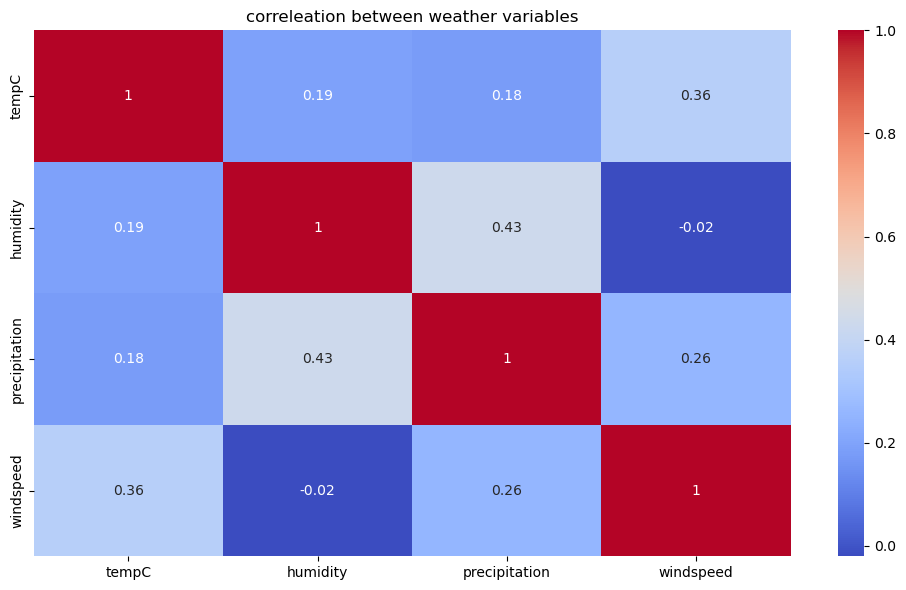

In [21]:
plt.figure(figsize=(10,6))
sns.heatmap(df[['tempC', 'humidity', 'precipitation', 'windspeed']].corr(), annot=True, cmap='coolwarm')
plt.title('correleation between weather variables')
plt.tight_layout()
plt.show()

In [44]:
df['date']= pd.to_datetime(df['date'], errors='coerce')
df['month']= df['date'].dt.month_name()
avg_temp_by_month=df.groupby("month")["tempC"].mean().sort_values()
print(avg_temp_by_month)

month
January      18.547097
December     19.541470
February     22.590566
November     23.641389
October      27.315241
March        27.399785
September    28.696667
August       28.890323
July         29.097696
June         29.792143
May          30.205069
April        30.254464
Name: tempC, dtype: float64


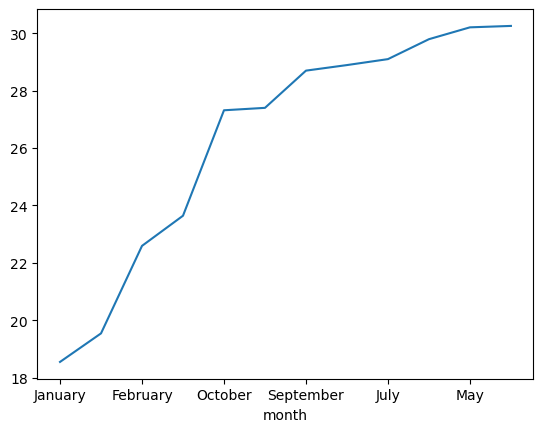

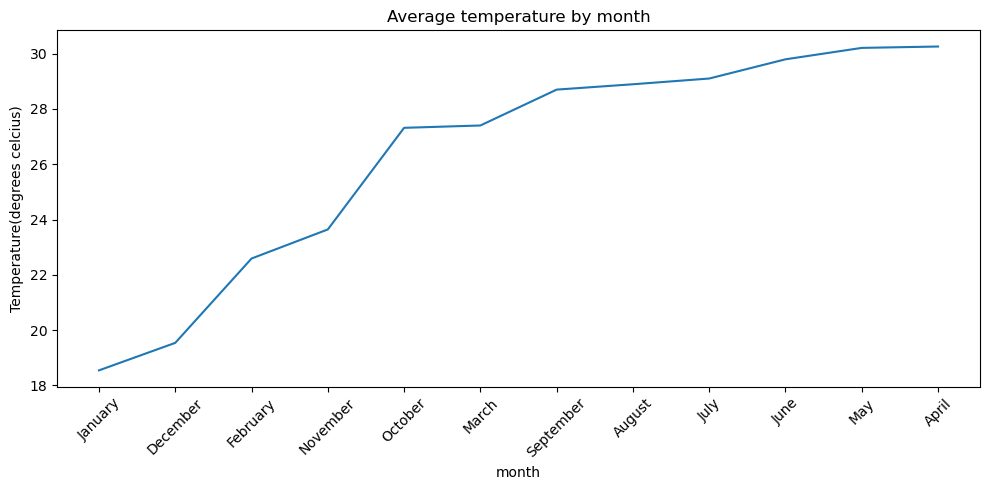

<Figure size 640x480 with 0 Axes>

In [64]:
month_order=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November","December"]
df["month"]=pd.Categorical(df["month"], categories=month_order, ordered=True)
avg_temp_by_month.plot()
plt.figure(figsize=(10,5))
sns.lineplot(avg_temp_by_month)
plt.title('Average temperature by month')
plt.ylabel('Temperature(degrees celcius)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.tight_layout()

C:\Users\user\AppData\Local\Temp\ipykernel_11460\2943241022.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_avg_temp=df.groupby("month")["tempC"].mean()


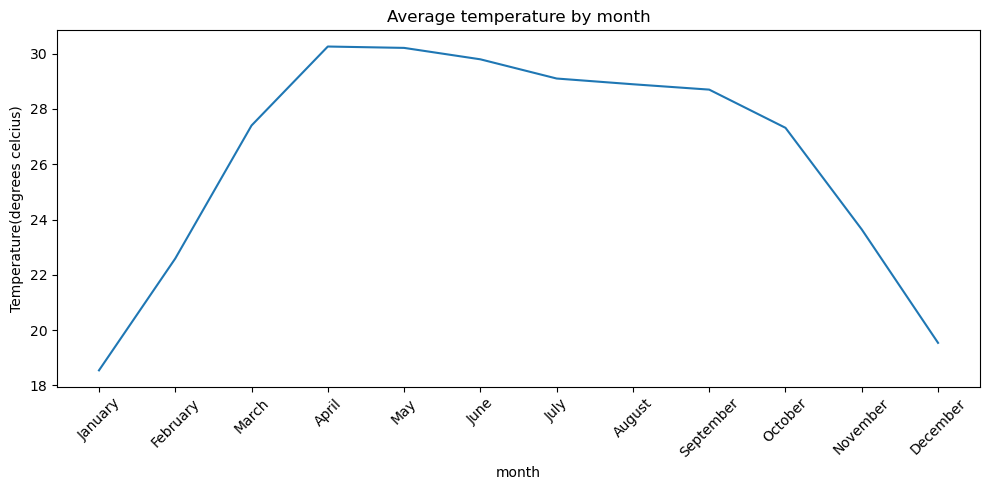

In [67]:
month_order=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November","December"]
df["month"]=pd.Categorical(df["month"], categories=month_order, ordered=True)
monthly_avg_temp=df.groupby("month")["tempC"].mean()
plt.figure(figsize=(10,5))
sns.lineplot(x=monthly_avg_temp.index, y=monthly_avg_temp.values)
plt.title('Average temperature by month')
plt.ylabel('Temperature(degrees celcius)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [68]:
df["year"]=df["date"].dt.year
rain_by_year_by_month=df.groupby(["year","month"])["precipitation"].sum()
print(rain_by_year_by_month)

C:\Users\user\AppData\Local\Temp\ipykernel_11460\1608634274.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rain_by_year_by_month=df.groupby(["year","month"])["precipitation"].sum()


year  month    
2010  January        0.0
      February      29.8
      March          6.1
      April         21.4
      May          231.0
                   ...  
2024  August         0.0
      September      0.0
      October        0.0
      November       0.0
      December       0.0
Name: precipitation, Length: 180, dtype: float64


In [70]:
df['year']=df['date'].dt.year
rain_by_year_by_month= df.groupby(["year", "month"])["precipitation"].sum()
print(rain_by_year_by_month)

C:\Users\user\AppData\Local\Temp\ipykernel_11460\3852916218.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rain_by_year_by_month= df.groupby(["year", "month"])["precipitation"].sum()


year  month    
2010  January        0.0
      February      29.8
      March          6.1
      April         21.4
      May          231.0
                   ...  
2024  August         0.0
      September      0.0
      October        0.0
      November       0.0
      December       0.0
Name: precipitation, Length: 180, dtype: float64


In [71]:
records_per_month=df['month'].value_counts().sort_index()
print(records_per_month)

month
January      465
February     424
March        465
April        448
May          434
June         420
July         434
August       434
September    420
October      374
November     360
December     381
Name: count, dtype: int64


In [73]:
print(records_per_month.isnull())

month
January      False
February     False
March        False
April        False
May          False
June         False
July         False
August       False
September    False
October      False
November     False
December     False
Name: count, dtype: bool


In [80]:
print(df.columns.tolist())

['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'humidity', 'windspeed', 'winddirection', 'tempC', 'tempminC', 'tempmaxC', 'precipitation', 'date', 'month', 'year']


In [84]:
df=df[[col for col in df.columns if not col.startswith('Unnamed')]]
print(df.columns.tolist())

['humidity', 'windspeed', 'winddirection', 'tempC', 'tempminC', 'tempmaxC', 'precipitation', 'date', 'month', 'year']


In [85]:
df=df.loc[:,~df.columns.str.contains('^Unnamed', case=False)]
print(df.columns.tolist())

['humidity', 'windspeed', 'winddirection', 'tempC', 'tempminC', 'tempmaxC', 'precipitation', 'date', 'month', 'year']


In [86]:

print (df)

      humidity  windspeed  winddirection  tempC  tempminC  tempmaxC  \
0         79.5       12.2          343.1   18.6      15.2      24.2   
1         85.0       11.2          341.0   17.4      14.8      22.4   
2         83.2       11.5          340.9   17.9      14.0      24.2   
3         82.8       10.1          345.9   17.2      13.4      23.8   
4         83.0        9.7          341.3   17.2      13.6      23.8   
...        ...        ...            ...    ...       ...       ...   
5054      45.8       20.5          223.5   34.3      28.3      42.3   
5055      49.9       17.6          200.4   34.4      28.0      42.6   
5056      53.5       32.8          204.0   33.9      27.5      43.4   
5057      59.1       27.4          203.8   33.7      26.9      43.2   
5058      55.4       25.2          214.1   34.5      27.4      43.6   

      precipitation       date    month  year  
0               0.0 2022-01-01  January  2022  
1               0.0 2022-01-02  January  2022  
2  

In [88]:
df=df.loc[:,~df.columns.str.contains('^Unnamed')]
df.to_csv("cleaneddata.csv", index=False)

In [1]:
print('my name is bethel')

my name is bethel


In [2]:
a= 2
b= 67
print(a+b)

69
